In [0]:
from graphviz import Digraph
import IPython

In [0]:
class State:
  def __init__(self, is_first, f, s):
    self.is_first = is_first
    self.f = [max(f), min(f)]
    self.s = [max(s), min(s)]
    self.siblings = []
    self.is_drawn = False

  def __str__(self):
    s = str(self.f) + "\n" + str(self.s)
    if self.is_first:
        return "f\n" + s
    else:
        return "s\n" + s

  def params(self):
    return (self.is_first, self.f, self.s)

  def __eq__(self, other):
    return self.params() == other.params()

  def next_state(self, index):
    fi, si = index
    if self.f[fi] == 0 or self.s[si] == 0:
      return None
    d = self.f[fi] + self.s[si]
    f2 = self.f.copy()
    s2 = self.s.copy()
    if d >= 5:
      d = 0
    if self.is_first:
      s2[si] = d
    else:
      f2[fi] = d
    return State(not self.is_first, f2, s2)

In [0]:
def move(parent, is_first, nodes):
  for i in [(0, 0), (0, 1), (1, 0), (1, 1)]:
      child = parent.next_state(i)
      if child is None:
        continue
      if child in parent.siblings:
        continue
      s = str(child)
      child = nodes.get(s, child)
      nodes[s] = child
      parent.siblings.append(child)
      move(child, not is_first, nodes)

In [0]:
def make_tree():
    nodes ={}
    root = State(True, [1, 1], [1, 1])
    nodes[str(root)] = root
    move(root, True, nodes)
    return root

In [0]:
def make_graph(node, g):
  if node.is_drawn:
      return
  node.is_drawn = True
  ns = str(node)
  if max(node.f) == 0:
      g.node(ns, color="#FF9999", style="filled")
  elif max(node.s) == 0:
      g.node(ns, color="#9999FF", style="filled")
  else:
      g.node(ns)
  for n in node.siblings:
      g.edge(ns, str(n))
      make_graph(n, g)

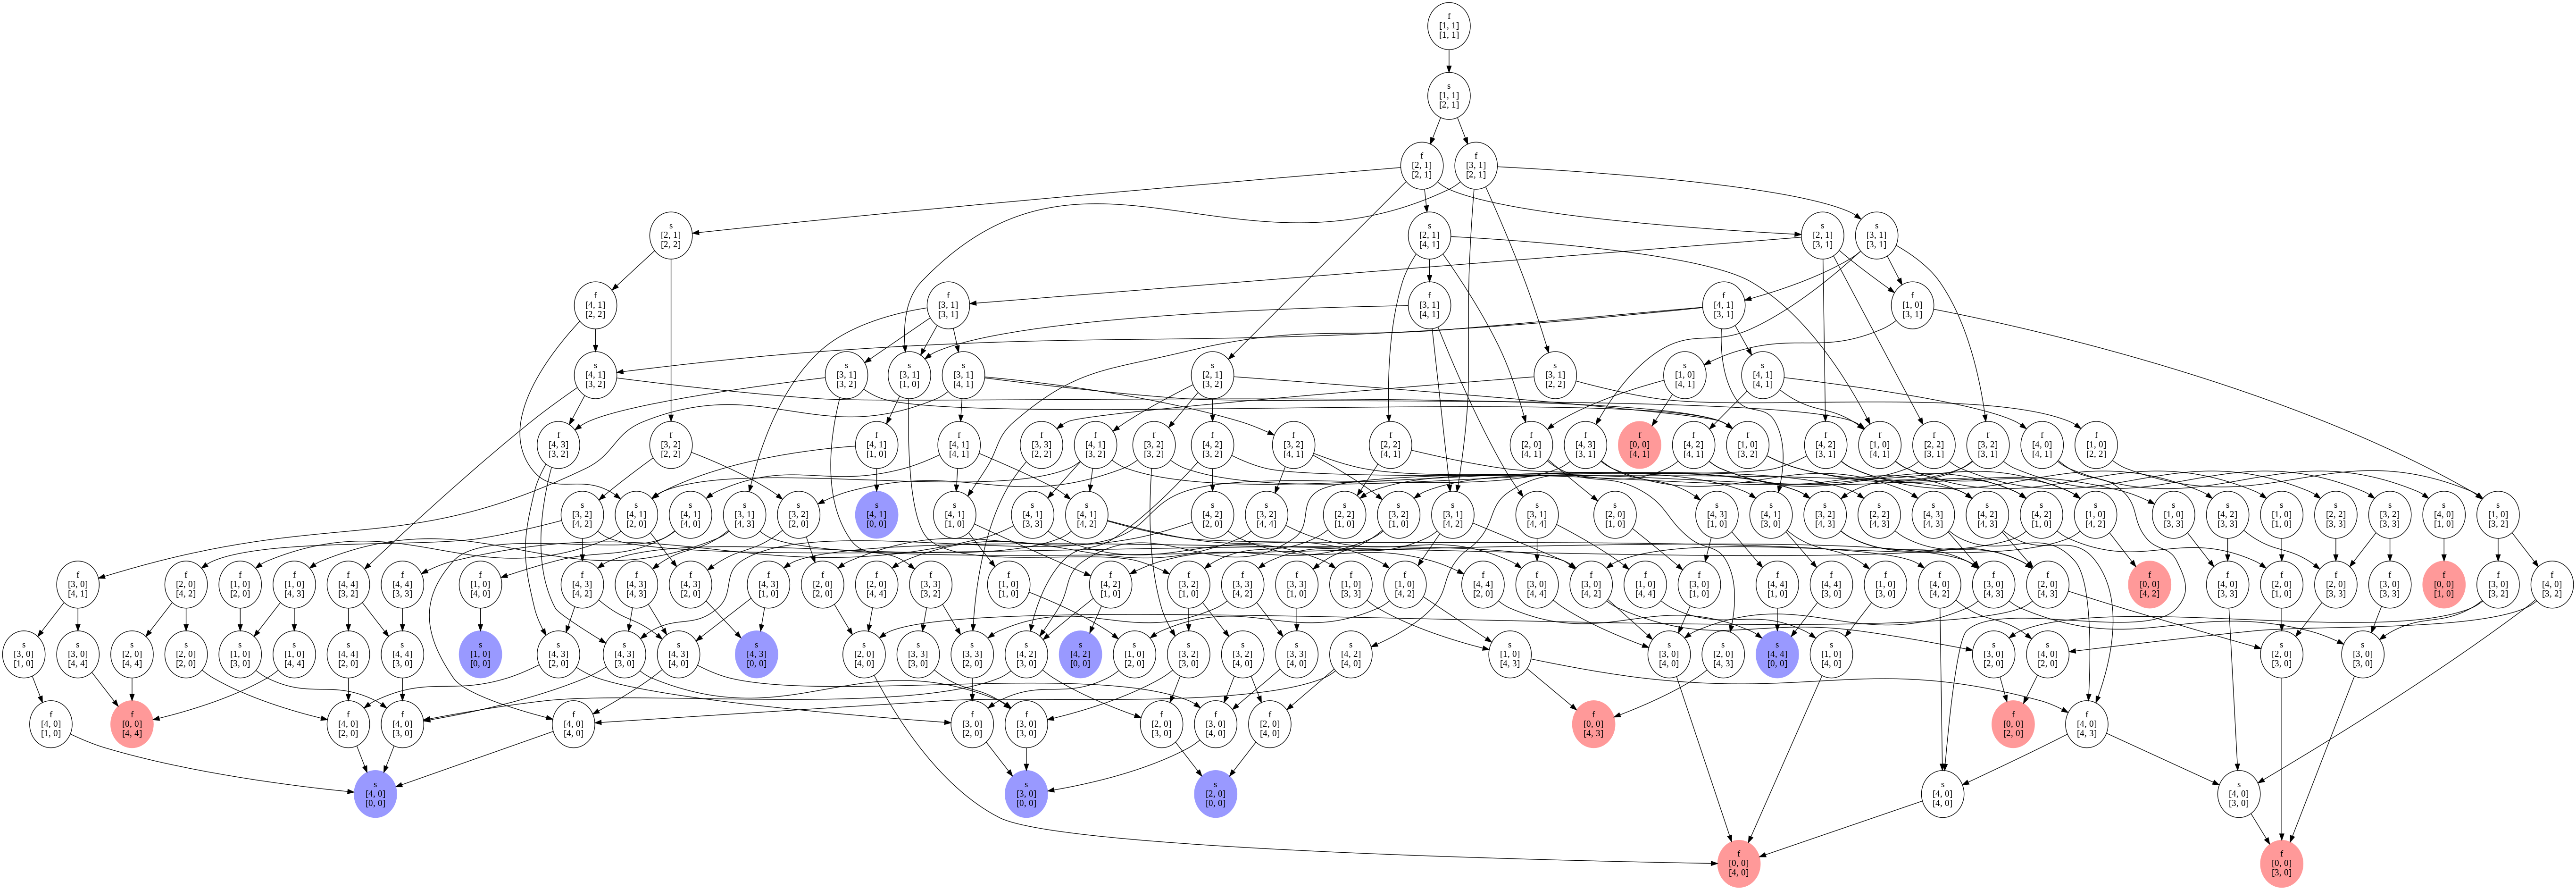

In [23]:
root = make_tree()
g = Digraph(format="png")
make_graph(root, g)
g.render("tree")
IPython.display.Image("tree.png")